In [1]:
! pip install textblob
! pip install vaderSentiment
! pip install scikit-learn
! pip install yfinance
! pip install nltk spacy
! pip install requests beautifulsoup4 pandas
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
! pip install requests

In [4]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:

def preprocess_text(text):
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in stemmed_tokens]

    return " ".join(lemmatized_tokens)


import requests
import csv
import string
import time
import re
from collections import defaultdict
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

api_key = '18aA1HmfAsH4aduUsODDM1CSk9T9wIrg'

sections_to_include = [
    "Science", "Corrections", "New York", "International Home", "U.S.", "Business Day",
    "Real Estate", "World", "Briefing", "Times Insider", "T Magazine", "Reader Center",
    "Opinion", "Technology", "Magazine", "Smarter Living", "Food", "T Brand",
    "Climate", "The Learning Network", "Health", "Your Money", "Obituaries"
]

articles_by_date = defaultdict(list)
for year in range(2023, 2024):

    for month in range(1, 6):
        url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
        print(url)
        response = requests.get(url)
        print(response)

        if response.status_code == 200:
            data = response.json()
            print(f"Status code: {response.status_code}")

            for article in data['response']['docs']:
                section_name = article['section_name']
                if section_name in sections_to_include:
                    date = article['pub_date'][:10]
                    headline = article['headline']['main']
                    articles_by_date[date].append(headline)

        else:
            print(f"Failed API. Status code: {response.status_code}")
        time.sleep(12)

# with open(f'nyt_articles.csv', mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Date', 'Headlines'])

#     for date, headlines in articles_by_date.items():
#         joined_headlines = " ".join(headlines)
#         writer.writerow([date, preprocess_text(joined_headlines)])

# Save the file to your Google Drive
with open('/content/drive/My Drive/finalnyt_articles_january.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Headlines'])

    for date, headlines in articles_by_date.items():
        joined_headlines = " ".join(headlines)
        writer.writerow([date, preprocess_text(joined_headlines)])

Mounted at /content/drive
https://api.nytimes.com/svc/archive/v1/2023/1.json?api-key=18aA1HmfAsH4aduUsODDM1CSk9T9wIrg
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2023/2.json?api-key=18aA1HmfAsH4aduUsODDM1CSk9T9wIrg
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2023/3.json?api-key=18aA1HmfAsH4aduUsODDM1CSk9T9wIrg
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2023/4.json?api-key=18aA1HmfAsH4aduUsODDM1CSk9T9wIrg
<Response [200]>
Status code: 200
https://api.nytimes.com/svc/archive/v1/2023/5.json?api-key=18aA1HmfAsH4aduUsODDM1CSk9T9wIrg
<Response [200]>
Status code: 200


In [27]:
from google.colab import files
files.upload()

Saving finalnyt_articles_january.csv to finalnyt_articles_january (1).csv


{'finalnyt_articles_january (1).csv': b'Date,Headlines\r\n2023-01-01,think question life begin tell u life begin bucha final rampag serv coda month atroc first afterlif pope benedict xvi quotat day today girl tv icon walter travers new celebr correct jan suddenli appear though bu go abl move veteran trickl special new york court know eric adam say want get stuff do strife school educ dept log record number discrimin complaint ok mexico save china global may lead polic offic injur machet attack near time squar north korea vow escal nuclear threat south guid lowdownpay mortgag new puzzl turn earth rubik cube complex u pour money chip even soar spend limit week busi southwest holiday meltdown happier new year exnurs record sexual assault patient polic say putin new year messag critic jail dont honor nazi histori rabbi haim druckman leader religi zionism die cook week india china fight himalaya forget beach bod tri soul resolut instead never well time short putin red line lula becom brazil

In [28]:
from google.colab import files
files.upload()

Saving finalnyt_articles.csv to finalnyt_articles (1).csv


In [303]:
df1=pd.read_csv('finalnyt_articles.csv')
df2=pd.read_csv('finalnyt_articles_january.csv')
print(df1.head())
print(df2.head())
print(df2.tail())

         Date                                          Headlines
0  2003-01-01  pataki inaugur address one fortunetel unforese...
1  2003-01-02  master key con digit brio quotat day pact lift...
2  2003-01-03  world busi brief asia china trade volum grow l...
3  2003-01-04  poor woman go castl besieg dr eleanor j gibson...
4  2003-01-05  compani insid year sidelin u su air rule perso...
         Date                                          Headlines
0  2023-01-01  think question life begin tell u life begin bu...
1  2023-01-02  california town rattl earthquak second time ma...
2  2023-01-03  go miss greed cynic boycott law school u new w...
3  2023-01-04  race test limit democrat redstat surviv strate...
4  2023-01-05  democrat unusu upclos view desanti mayor adam ...
           Date                                          Headlines
146  2023-05-27  desanti step attack trump hit crime covid read...
147  2023-05-28  white hous gop strike debt limit deal avert de...
148  2023-05-29  de

In [304]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock ticker and date range
ticker = 'AAPL'
start_date = '2003-01-01'
end_date = '2023-12-30'  # Adjust the end date as needed

# Fetch the historical stock data
msft_data = yf.download(ticker, start=start_date, end=end_date)

# Create a full date range from start to end date including all calendar days
# full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')  # 'D' stands for calendar days

# # Reindex the DataFrame to include all dates
# msft_data = msft_data.reindex(full_date_range)

# # Fill missing values by forward filling the last known data, then backward filling
# msft_data = msft_data.fillna(method='ffill').fillna(method='bfill')

# Save the data to a CSV file
csv_file_name = 'microsoft_stock_prices.csv'
msft_data.to_csv(csv_file_name)


# Read the CSV file to verify
data1 = pd.read_csv(csv_file_name)
print(data1.head())  # Print the first few rows of the CSV file
print(data1.tail())  # Print the first few rows of the CSV file


[*********************100%%**********************]  1 of 1 completed

         Date      Open      High       Low     Close  Adj Close     Volume
0  2003-01-02  0.256429  0.266429  0.256250  0.264286   0.223744  181428800
1  2003-01-03  0.264286  0.266607  0.260536  0.266071   0.225256  147453600
2  2003-01-06  0.268393  0.274643  0.265714  0.266071   0.225256  390532800
3  2003-01-07  0.264107  0.267857  0.258393  0.265179   0.224500  342344800
4  2003-01-08  0.260357  0.262679  0.257857  0.259821   0.219964  229644800
            Date        Open        High         Low       Close   Adj Close  \
5280  2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
5281  2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
5282  2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
5283  2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
5284  2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

        Volume  
5280  37122800  
5281  28919300  
5282  480877

In [305]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock ticker and date range
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-05-31'  # Adjust the end date as needed

# Fetch the historical stock data
msft_data = yf.download(ticker, start=start_date, end=end_date)

# Create a full date range from start to end date including all calendar days
# full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')  # 'D' stands for calendar days

# # Reindex the DataFrame to include all dates
# msft_data = msft_data.reindex(full_date_range)

# # Fill missing values by forward filling the last known data, then backward filling
# msft_data = msft_data.fillna(method='ffill').fillna(method='bfill')

# Save the data to a CSV file
csv_file_name = 'microsoft_stock_prices.csv'
msft_data.to_csv(csv_file_name)


# Read the CSV file to verify
data2 = pd.read_csv(csv_file_name)
print(data2.head())  # Print the first few rows of the CSV file
print(data2.tail())  # Print the first few rows of the CSV file


[*********************100%%**********************]  1 of 1 completed

         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216293   
1  2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   
2  2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166641   
3  2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735245   
4  2023-01-09  130.470001  133.410004  129.889999  130.149994  129.261612   

      Volume  
0  112117500  
1   89113600  
2   80962700  
3   87754700  
4   70790800  
           Date        Open        High         Low       Close   Adj Close  \
97   2023-05-23  173.130005  173.380005  171.279999  171.559998  170.885162   
98   2023-05-24  171.089996  172.419998  170.520004  171.839996  171.164062   
99   2023-05-25  172.410004  173.899994  171.690002  172.990005  172.309555   
100  2023-05-26  173.320007  175.770004  173.110001  175.429993  174.739944   
101  2023-05-30  176.960007  178.990005  176.570007 

In [306]:
merge=df1.merge(data1,left_on='Date',right_on='Date')
merge1=df2.merge(data2,left_on='Date',right_on='Date')
merge1

,Date,Headlines,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,go miss greed cynic boycott law school u new w...,130.279999,130.899994,124.169998,125.070000,124.216293,112117500
1,2023-01-04,race test limit democrat redstat surviv strate...,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2,2023-01-05,democrat unusu upclos view desanti mayor adam ...,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
3,2023-01-06,mccarthi antagonist want wont budg make americ...,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
4,2023-01-09,phoenix polic investig detent wall street jour...,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
...,...,...,...,...,...,...,...,...
97,2023-05-23,meet biden mccarthi yield deal driver crash tr...,173.130005,173.380005,171.279999,171.559998,170.885162,50747300
98,2023-05-24,ai photoshop get easi mayb easi time reach con...,171.089996,172.419998,170.520004,171.839996,171.164062,45143500
99,2023-05-25,dehsanti deesanti even inconsist polic use exc...,172.410004,173.899994,171.690002,172.990005,172.309555,56058300
100,2023-05-26,crime sediti conspiraci differ insurrect treas...,173.320007,175.770004,173.110001,175.429993,174.739944,54835000


In [307]:
merge['Subjectivity']=merge['Headlines'].apply(getsubjectivity)
merge['Polarity']=merge['Headlines'].apply(getpolarity)
merge1['Subjectivity']=merge1['Headlines'].apply(getsubjectivity)
merge1['Polarity']=merge1['Headlines'].apply(getpolarity)

In [174]:
merge.head(3)
merge.tail(3)

,Date,Headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity
4215,2023-12-27,michael flynn rhode island hall fame inclus pr...,298.000000,299.000000,290.850006,295.000000,295.000000,1411700,0.418709,0.019598
4216,2023-12-28,herbert kohl former wisconsin senat milwauke b...,293.609985,297.250000,290.640015,291.450012,291.450012,1265100,0.341295,0.121653
4217,2023-12-29,main join colorado find trump inelig primari b...,291.510010,293.339996,280.170013,284.260010,284.260010,2101300,0.447244,0.103695


In [308]:
def getSIA(text):
    sia=SentimentIntensityAnalyzer()
    sentiment=sia.polarity_scores(text)
    return sentiment

In [309]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0
for i in range(0,len(merge['Headlines'])):
    SIA=getSIA(merge['Headlines'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [310]:
merge['Compound']=compound
merge['Negative']=neg
merge['Neutral']=neu
merge['Positive']=pos

In [311]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0
for i in range(0,len(merge1['Headlines'])):
    SIA=getSIA(merge1['Headlines'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])
merge1['Compound']=compound
merge1['Negative']=neg
merge1['Neutral']=neu
merge1['Positive']=pos

In [39]:
!pip install ta

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import ta  # Technical Analysis library

              precision    recall  f1-score   support

           0       0.40      0.86      0.55         7
           1       0.50      0.10      0.17        10

    accuracy                           0.41        17
   macro avg       0.45      0.48      0.36        17
weighted avg       0.46      0.41      0.32        17



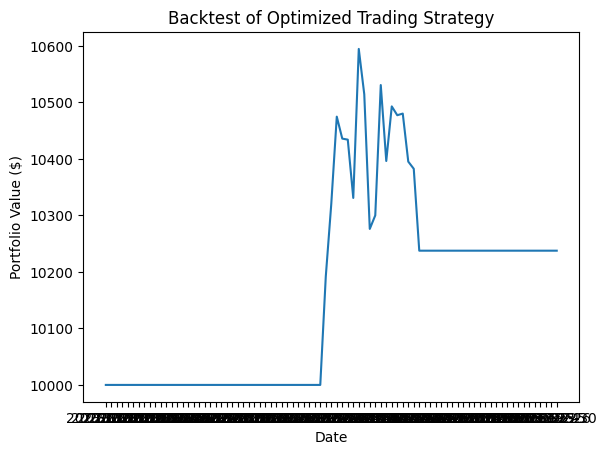

Sharpe Ratio: 0.03651582537732391


In [20]:
merge1['SMA_20'] = ta.trend.sma_indicator(merge1['Close'], window=20)
merge1['EMA_20'] = ta.trend.ema_indicator(merge1['Close'], window=20)
merge1['RSI'] = ta.momentum.rsi(merge1['Close'], window=14)

# Drop rows with NaN values created by technical indicators
merge1.dropna(inplace=True)

# Define features and labels
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'SMA_20', 'EMA_20', 'RSI']
X = merge1[features]
y = np.where(merge1['Close'].shift(-1) > merge1['Close'], 1, 0)  # Binary classification: 1 for price increase, 0 for decrease

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

# Predict
merge1['Predicted_Label'] = model.predict(X)

# Evaluate model
print(classification_report(y_test, model.predict(x_test)))

# Define the trading strategy
def trading_strategy(data):
    buy_signals = []
    sell_signals = []
    position = 0  # 1 indicates holding a stock, 0 indicates not holding

    # Iterate over the DataFrame using .iterrows()
    for index, row in data.iterrows():
        if position == 0:  # Not holding any stock
            if (row['Predicted_Label'] == 1 and row['Compound'] > 0.05 and
                row['Close'] > row['SMA_20'] and row['RSI'] < 70):
                buy_signals.append(row['Date'])
                position = 1  # Buy stock
        elif position == 1:  # Holding stock
            if (row['Predicted_Label'] == 0 and row['Compound'] < -0.05 and
                row['Close'] < row['SMA_20'] and row['RSI'] > 30):
                sell_signals.append(row['Date'])
                position = 0  # Sell stock

    return buy_signals, sell_signals

# Apply trading strategy
buy_signals, sell_signals = trading_strategy(merge1)

# Backtest the trading strategy
def backtest_strategy(data, buy_signals, sell_signals):
    initial_balance = 10000  # Initial balance in dollars
    balance = initial_balance
    shares = 0
    portfolio_values = []

    for date in data['Date']:
        if date in buy_signals:
            shares = balance / data[data['Date'] == date]['Close'].values[0]
            balance = 0
        elif date in sell_signals:
            balance = shares * data[data['Date'] == date]['Close'].values[0]
            shares = 0
        portfolio_value = balance + shares * data[data['Date'] == date]['Close'].values[0]
        portfolio_values.append(portfolio_value)

    return portfolio_values

# Calculate portfolio values
portfolio_values = backtest_strategy(merge1, buy_signals, sell_signals)

# Plot portfolio values
plt.plot(merge1['Date'], portfolio_values)
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Backtest of Optimized Trading Strategy')
plt.show()

# Calculate daily returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Convert daily returns to a Pandas Series
daily_returns = pd.Series(daily_returns)

# Calculate the mean daily return
mean_daily_return = daily_returns.mean()

# Calculate the standard deviation of daily returns
std_daily_return = daily_returns.std()

# Assuming an annual risk-free rate of 2%
risk_free_rate_annual = 0.02

# Convert annual risk-free rate to daily risk-free rate
risk_free_rate_daily = risk_free_rate_annual / 252  # Assuming 252 trading days in a year

# Compute the Sharpe Ratio
sharpe_ratio = (mean_daily_return - risk_free_rate_daily) / std_daily_return

print(f"Sharpe Ratio: {sharpe_ratio}")

In [142]:
merge.head(3)

,Date,Headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2003-01-02,master key con digit brio quotat day pact lift...,6.56,7.11,6.47,7.01,7.01,17474800,0.409389,0.062259,-0.9891,0.138,0.772,0.090
1,2003-01-03,world busi brief asia china trade volum grow l...,7.01,7.19,6.86,6.94,6.94,6235700,0.328903,0.030250,-0.9972,0.142,0.795,0.063
2,2003-01-06,steril offer addict reopen ethic issu bear ste...,7.05,7.23,7.00,7.16,7.16,6833200,0.363152,0.075879,-0.9948,0.160,0.760,0.080


In [143]:
data1.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,6.56,7.11,6.47,7.01,7.01,17474800
1,2003-01-03,7.01,7.19,6.86,6.94,6.94,6235700
2,2003-01-06,7.05,7.23,7.00,7.16,7.16,6833200


In [23]:
data2.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,243.080002,245.750000,237.399994,239.580002,237.036011,25740000
1,2023-01-04,232.279999,232.869995,225.960007,229.100006,226.667297,50623400
2,2023-01-05,227.199997,227.550003,221.759995,222.309998,219.949371,39585600


In [24]:
merge1.head(3)

,Date,Headlines,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,SMA_20,EMA_20,RSI,Predicted_Label
19,2023-01-31,american even notic improv economi u plan end ...,243.449997,247.949997,242.949997,247.809998,245.178589,26541100,0.335321,-0.047520,-0.9965,0.166,0.755,0.079,237.2810,240.442244,60.867186,1
20,2023-02-01,joe biden rememb year air forc say propos chin...,248.000000,255.179993,245.470001,252.750000,250.066162,31259900,0.321928,-0.034147,-0.9921,0.141,0.779,0.080,237.9395,241.614411,65.459458,1
21,2023-02-02,oregon man want tortur woman kill peopl polic ...,258.820007,264.690002,257.250000,264.600006,261.790314,39940400,0.349984,-0.010677,-0.9833,0.134,0.764,0.101,239.7145,243.803516,73.494649,0


In [312]:
t=[]
y=[]
t.append(0)
y.append(0)
for i in range(1,len(merge['Close'])):
  t.append(merge['Close'][i]-merge['Close'][i-1])
for i in range(1,len(merge1['Close'])):
  y.append(merge1['Close'][i]-merge1['Close'][i-1])
merge['Change']=t
merge1['Change']=y


In [313]:
l=[]
l.append(0)
for i in range(1,len(merge['Close'])):
  if merge['Close'][i]>merge['Close'][i-1]:
    l.append(1)
  else:
    l.append(0)
merge['Label']=l

In [314]:
l=[]
l.append(0)
for i in range(1,len(merge1['Close'])):
  if merge1['Close'][i]>merge1['Close'][i-1]:
    l.append(1)
  else:
    l.append(0)
merge1['Label']=l

In [315]:
p=0
u=[]
for i in range(0,len(merge['Label'])):
  if merge['Label'][i]==1:
    p+=1
    u.append(p)
  else:
    p=0
    u.append(p)
merge['Cumulitive']=u

In [316]:
p=0
u=[]
for i in range(0,len(merge1['Label'])):
  if merge1['Label'][i]==1:
    p+=1
    u.append(p)
  else:
    p=0
    u.append(p)
merge1['Cumulitive']=u

In [317]:
keepcolums=['Open', 'High', 'Low', 'Close', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive','Change','Label','Cumulitive']
df=merge[keepcolums]
df
df1=merge1[keepcolums]
df1

,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Change,Label,Cumulitive
0,130.279999,130.899994,124.169998,125.070000,112117500,0.323118,0.001441,-0.9960,0.179,0.754,0.067,0.000000,0,0
1,126.889999,128.660004,125.080002,126.360001,89113600,0.399421,0.054353,-0.9967,0.181,0.749,0.069,1.290001,1,1
2,127.129997,127.769997,124.760002,125.019997,80962700,0.430101,0.181324,-0.9895,0.144,0.766,0.091,-1.340004,0,0
3,126.010002,130.289993,124.889999,129.619995,87754700,0.369123,0.083806,-0.9985,0.206,0.727,0.066,4.599998,1,1
4,130.470001,133.410004,129.889999,130.149994,70790800,0.364407,0.028325,-0.9970,0.208,0.726,0.066,0.529999,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,173.130005,173.380005,171.279999,171.559998,50747300,0.363136,0.071566,-0.9761,0.142,0.755,0.103,-2.639999,0,0
98,171.089996,172.419998,170.520004,171.839996,45143500,0.340084,0.021734,-0.9948,0.161,0.752,0.087,0.279999,1,1
99,172.410004,173.899994,171.690002,172.990005,56058300,0.369192,0.028898,-0.9953,0.133,0.810,0.057,1.150009,1,2
100,173.320007,175.770004,173.110001,175.429993,54835000,0.358613,0.073092,-0.9944,0.163,0.755,0.081,2.439987,1,3


In [318]:
X=df1
X = df.drop('Label', axis=1)
X = np.array(X)
y = np.array(df['Label'])

In [320]:
X=df
xtrain=df1
X = df.drop('Label', axis=1)
xtrain = df1.drop('Label', axis=1)
X = np.array(X)
xtrain = np.array(xtrain)
y = np.array(df['Label'])
ytrain=np.array(df1['Label'])
x_train, x_test, y_train, y_test=(X,xtrain,y,ytrain)

In [321]:
model=LinearDiscriminantAnalysis()
model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [257]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [258]:
# Install the sklearn package
!pip install sklearn

# Import the necessary modules from sklearn
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, pred))

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.95      0.97        59

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



In [326]:
# Define buy and sell signals based on model predictions and sentiment scores
def trading_strategy(data):
    buy_signals = []
    sell_signals = []
    position = 0  # 1 indicates holding a stock, 0 indicates not holding

    for i in range(1,len(data)-1):
        if position == 0:  # Not holding any stock
            if data['Predicted_Label'][i] == 0 and data['Predicted_Label'][i+1]==1  :  # Positive sentiment and predicted price increase
                buy_signals.append(data['Date'][i])
                position = 1  # Buy stock
        elif position == 1:  # Holding stock
            if data['Predicted_Label'][i] == 1 and  data['Predicted_Label'][i+1]==0 :  # Negative sentiment and predicted price decrease
                sell_signals.append(data['Date'][i])
                position = 0  # Sell stock

    return buy_signals, sell_signals

# Add predicted labels to the dataframe
merge1['Predicted_Label'] = model.predict(x_test)

# Apply trading strategy
buy_signals, sell_signals = trading_strategy(merge1)

print("Buy Signals:", buy_signals)
print("Sell Signals:", sell_signals)


Buy Signals: ['2023-01-05', '2023-01-12', '2023-01-18', '2023-01-25', '2023-01-30', '2023-02-06', '2023-02-09', '2023-02-14', '2023-02-21', '2023-02-24', '2023-03-01', '2023-03-07', '2023-03-10', '2023-03-17', '2023-03-22', '2023-03-28', '2023-04-05', '2023-04-12', '2023-04-17', '2023-04-21', '2023-04-26', '2023-05-04', '2023-05-09', '2023-05-16', '2023-05-23']
Sell Signals: ['2023-01-11', '2023-01-17', '2023-01-24', '2023-01-27', '2023-02-03', '2023-02-07', '2023-02-13', '2023-02-15', '2023-02-23', '2023-02-27', '2023-03-06', '2023-03-08', '2023-03-16', '2023-03-21', '2023-03-24', '2023-04-03', '2023-04-06', '2023-04-13', '2023-04-19', '2023-04-24', '2023-04-28', '2023-05-05', '2023-05-11', '2023-05-19']


In [327]:
print(len(buy_signals))
print(len(sell_signals))

25
24


peak =20484.681887664174
max_drawdown=1.354122122483514e-16


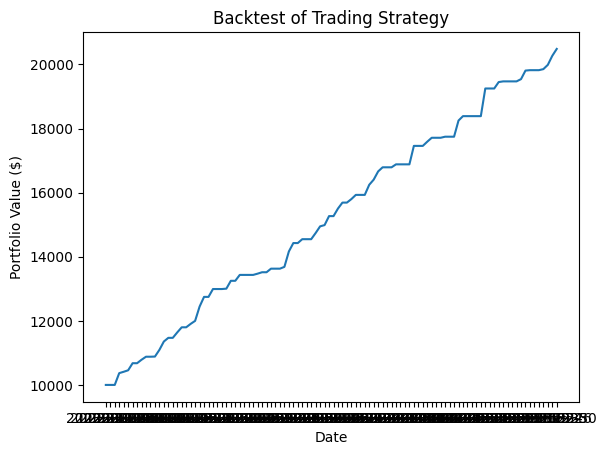

In [328]:
# Backtest the trading strategy
def backtest_strategy(data, buy_signals, sell_signals):
    initial_balance = 10000  # Initial balance in dollars
    balance = initial_balance
    shares = 0
    portfolio_values = []
    for date in data['Date']:
        if date in buy_signals:
            shares = balance / data[data['Date'] == date]['Close'].values[0]
            balance = 0
        elif date in sell_signals:
            balance = shares * data[data['Date'] == date]['Close'].values[0]
            shares = 0
        portfolio_value = balance + shares * data[data['Date'] == date]['Close'].values[0]
        portfolio_values.append(portfolio_value)

    return portfolio_values
portfolio_values = backtest_strategy(merge1, buy_signals, sell_signals)
daily_drawdowns = np.zeros_like(portfolio_values)  # Initialize array for daily drawdowns

peak = portfolio_values[0]  # Set initial peak as the first value

for i in range(1, len(portfolio_values)):
  daily_drawdown = (peak - portfolio_values[i]) / peak
  daily_drawdowns[i] = daily_drawdown
  peak = max(peak, portfolio_values[i])
print(f"peak ={peak}")
# Calculate portfolio values
max_drawdown = np.max(daily_drawdowns)
print(f"max_drawdown={max_drawdown}")
import matplotlib.pyplot as plt

plt.plot(merge1['Date'], portfolio_values)
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Backtest of Trading Strategy')
plt.show()


In [329]:
# Calculate daily returns of the portfolio
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Convert daily returns to a Pandas Series for easier handling
daily_returns = pd.Series(daily_returns)
# Calculate the mean daily return
mean_daily_return = daily_returns.mean()

# Calculate the standard deviation of daily returns
std_daily_return = daily_returns.std()
# Assuming an annual risk-free rate of 2%
risk_free_rate_annual = 0.00

# Convert annual risk-free rate to daily risk-free rate
# risk_free_rate_daily = risk_free_rate_annual / 252  # Assuming 252 trading days in a year
# Compute the Sharpe Ratio
sharpe_ratio = (mean_daily_return - risk_free_rate_daily) / std_daily_return
print(sharpe_ratio)

0.7063809289886621
